# references

https://www.kaggle.com/chewzy/eda-weird-images-with-new-updates/  
https://www.kaggle.com/ttahara/eda-compare-number-of-culture-and-tag-attributes  
https://www.kaggle.com/kenmatsu4/first-eda-label-coocurrence-matrix  

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

#カラム内の文字数。デフォルトは50
pd.set_option("display.max_colwidth", 100)
#行数
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

import os
print(os.listdir("../input"))

['imet-mydataset', 'imet-my-pretrained-models', 'imet-2019-fgvc6']


In [2]:
submission = pd.read_csv("../input/imet-mydataset/submission.csv", index_col=0)
train_df = pd.read_csv("../input/imet-2019-fgvc6/train.csv", index_col=0)
labels_df = pd.read_csv("../input/imet-2019-fgvc6/labels.csv", index_col=0)

# Train EDA

Text(0.5, 1.0, '# of label for each instance.')

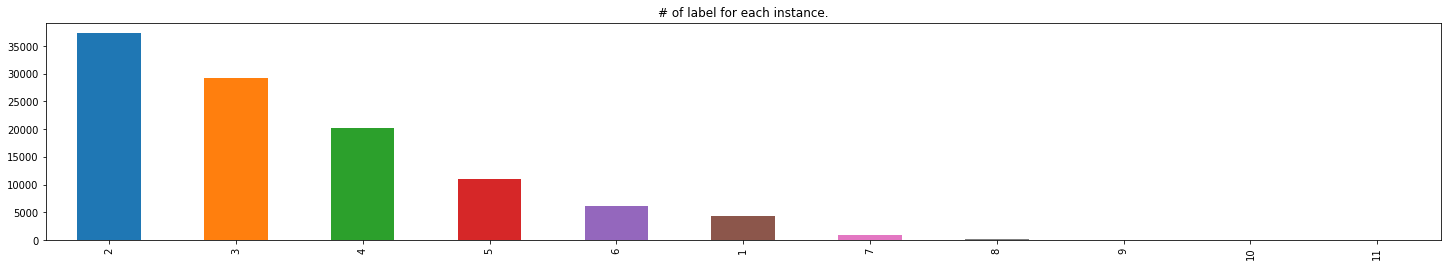

In [3]:
df_label_len = train_df.attribute_ids.str.split(" ").apply(len)
plt.figure(figsize=(25, 4))
df_label_len.value_counts().plot.bar()
plt.title(f"# of label for each instance.")

### null

In [4]:
train_df.attribute_ids.isnull().sum()

0

In [5]:
train_attr_ohot = np.zeros((len(train_df), len(labels_df)), dtype=int)

for idx, attr_arr in enumerate(train_df.attribute_ids.str.split(" ").apply(lambda l: list(map(int, l))).values):
    train_attr_ohot[idx, attr_arr] = 1

In [6]:
names_arr = labels_df.attribute_name.values
train_df["attribute_names"] = [", ".join(names_arr[arr == 1]) for arr in train_attr_ohot]

In [7]:
train_df["attr_num"] = train_attr_ohot.sum(axis=1)
train_df["culture_attr_num"] = train_attr_ohot[:, :398].sum(axis=1)
train_df["tag_attr_num"] = train_attr_ohot[:, 398:].sum(axis=1)

### number of attributes each art has

In [8]:
train_df.attr_num.value_counts().sort_index()

1      4324
2     37356
3     29200
4     20208
5     10946
6      6157
7       920
8       103
9        17
10        5
11        1
Name: attr_num, dtype: int64

### number of "culture" attributes each art has

In [9]:
train_df.culture_attr_num.value_counts().sort_index()

0    11872
1    87679
2     9166
3      461
4       59
Name: culture_attr_num, dtype: int64

### number of "tag" attributes each art has

In [10]:
train_df.tag_attr_num.value_counts().sort_index()

0      220
1    40440
2    30884
3    20853
4    10334
5     6229
6      216
7       47
8       11
9        3
Name: tag_attr_num, dtype: int64

### Plot

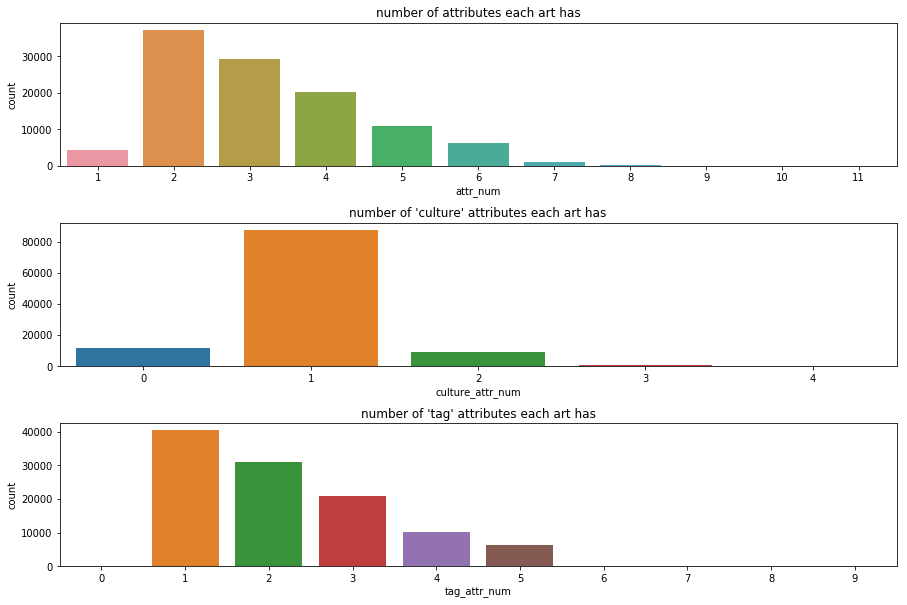

In [11]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)
ax1 = fig.add_subplot(3,1,1)
sns.countplot(train_df.attr_num,)
ax1.set_title("number of attributes each art has")
ax2 = fig.add_subplot(3,1,2,)
sns.countplot(train_df.culture_attr_num, ax=ax2)
ax2.set_title("number of 'culture' attributes each art has")
ax3 = fig.add_subplot(3,1,3,)
ax3.set_title("number of 'tag' attributes each art has")
sns.countplot(train_df.tag_attr_num, ax=ax3)

### Notes
**attributesは最大でも11**  
**coltureは最大でも4**  
**tagは最大でも9**  
**null=0より何かしらのattributeはある**  

# Submission EDA

Text(0.5, 1.0, '# of label for each instance.')

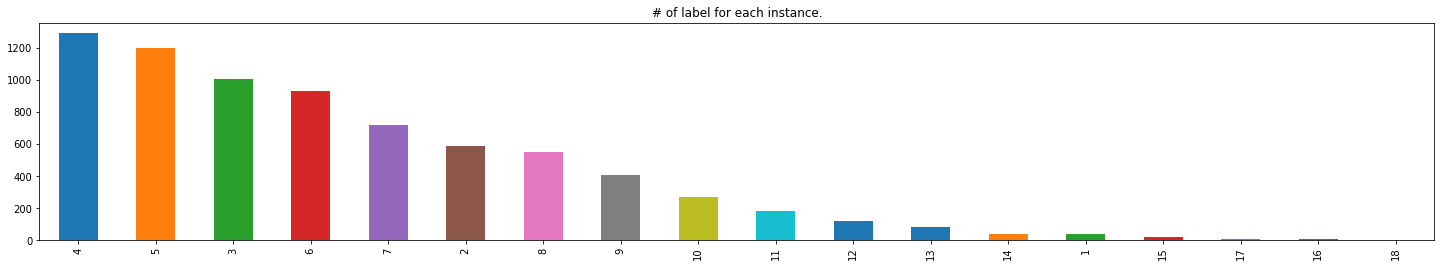

In [12]:
df_label_len = submission.attribute_ids.apply(lambda x: len(str(x).split()))
plt.figure(figsize=(25, 4))
df_label_len.value_counts().plot.bar()
plt.title(f"# of label for each instance.")

### null

In [13]:
submission.attribute_ids.isnull().sum()

3

In [14]:
submission = submission.fillna(-1)

In [15]:
train_attr_ohot = np.zeros((len(submission), len(labels_df)), dtype=int)

for idx, attr_arr in enumerate(submission.attribute_ids.apply(lambda x: [int(i) for i in str(x).split()])):
    train_attr_ohot[idx, attr_arr] = 1

In [16]:
names_arr = labels_df.attribute_name.values
submission["attribute_names"] = [", ".join(names_arr[arr == 1]) for arr in train_attr_ohot]

In [17]:
submission["attr_num"] = train_attr_ohot.sum(axis=1)
submission["culture_attr_num"] = train_attr_ohot[:, :398].sum(axis=1)
submission["tag_attr_num"] = train_attr_ohot[:, 398:].sum(axis=1)

### number of attributes each art has

In [18]:
submission.attr_num.value_counts().sort_index()

1       40
2      588
3     1004
4     1292
5     1197
6      927
7      716
8      548
9      403
10     271
11     183
12     116
13      80
14      40
15      19
16       8
17       9
18       2
Name: attr_num, dtype: int64

### number of "culture" attributes each art has

In [19]:
submission.culture_attr_num.value_counts().sort_index()

0     490
1    3305
2    2117
3    1066
4     342
5     101
6      14
7       7
9       1
Name: culture_attr_num, dtype: int64

### number of "tag" attributes each art has

In [20]:
submission.tag_attr_num.value_counts().sort_index()

0       19
1      915
2     1349
3     1521
4     1202
5      796
6      532
7      408
8      266
9      180
10     126
11      72
12      30
13      21
14       4
15       2
Name: tag_attr_num, dtype: int64

### Plot

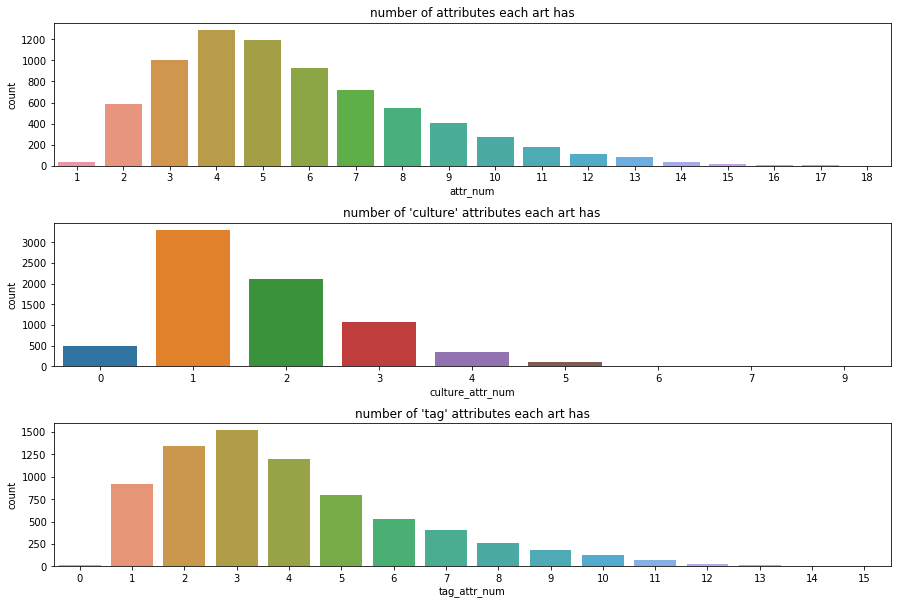

In [21]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)
ax1 = fig.add_subplot(3,1,1)
sns.countplot(submission.attr_num,)
ax1.set_title("number of attributes each art has")
ax2 = fig.add_subplot(3,1,2,)
sns.countplot(submission.culture_attr_num, ax=ax2)
ax2.set_title("number of 'culture' attributes each art has")
ax3 = fig.add_subplot(3,1,3,)
ax3.set_title("number of 'tag' attributes each art has")
sns.countplot(submission.tag_attr_num, ax=ax3)

### Notes
trainより得られた情報は以下  

**attributesは最大でも11**  
**coltureは最大でも4**  
**tagは最大でも9**  
**null=0より何かしらのattributeはある**  

よってsubmissionにおいて 

①**cultureは最大でも4になるように、cultureからは上位4確率を選択**  
②**tagは最大でも9になるように、tagからは上位9確率を選択**  
③**attributesは最大でも11になるように、attributesからは上位11確率を選択**  
④**nullのidに対しては一番確率の高いattributesを選択**  

上記はあくまでpost-process候補である、ハマる自信は微妙  

### Data Description
https://www.kaggle.com/c/imet-2019-fgvc6/data

Each object is annotated by a single annotator without a verification step. Annotators were advised to add multiple labels from an ontology provided by The Met, and additionally are allowed to add free-form text when they see fit. They were able to view the museum's online collection pages and advised to avoid annotating labels already present. The attributes can relate to what one "sees" in the work or what one infers as the object's "utility."

**各オブジェクトは、検証ステップなしで単一のアノテーターによってアノテーションが付けられます。アノテーターはThe Metによって提供されたオントロジーから複数のラベルを追加するように忠告されました（<---個人的に重要だと思う部分）**  
そしてさらに彼らが適切であると思うとき自由形式のテキストを追加することが許可されています。彼らは美術館のオンラインコレクションページを閲覧することができ、既に存在するラベルに注釈をつけるのを避けるように勧めました。属性は、作品の中で「見る」ものや、オブジェクトの「効用」として何を推測するものかに関係します

「オントロジーから複数のラベルを追加するように忠告された」とある  
これはアノテーターが自身で付けたラベルに関連付けて紐づけられるラベルのこと？  
ex) 676 tag::forests が付いているなら 1046 tag::trees も付けるとか？（直感的にtreesはforestsの上位概念に位置するはず）  
チェックしてみよう

In [22]:
# 41 rows
train_df.loc[train_df.attribute_names.str.contains("tag::forests")]\
        .loc[train_df.attribute_names.str.contains("tag::trees")].tail()

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
ec2bec075dac89ec,13 676 1046,"culture::american, tag::forests, tag::trees",3,1,2
f0f94a3f216b0367,676 1046,"tag::forests, tag::trees",2,0,2
f4bf38a52f74915d,13 676 1046,"culture::american, tag::forests, tag::trees",3,1,2
f65d75085827314e,676 1046,"tag::forests, tag::trees",2,0,2
f8f20cd9de3cf86c,13 676 1046,"culture::american, tag::forests, tag::trees",3,1,2


In [23]:
# 150 rows
train_df.loc[train_df.attribute_names.str.contains("tag::forests")].tail()

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
f65d75085827314e,676 1046,"tag::forests, tag::trees",2,0,2
f70af6a6568d9bff,131 676 776,"culture::flemish, tag::forests, tag::landscapes",3,1,2
f813c5a0055f761b,147 676 813,"culture::french, tag::forests, tag::men",3,1,2
f8f20cd9de3cf86c,13 676 1046,"culture::american, tag::forests, tag::trees",3,1,2
fb037a6517dda3dd,111 676 738,"culture::dutch, tag::forests, tag::human figures",3,1,2


In [24]:
# 5591 rows
train_df.loc[train_df.attribute_names.str.contains("tag::trees")].tail()

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
ffb9758d5fdec28,147 538 655 813 1046 1092,"culture::french, tag::children, tag::fans, tag::men, tag::trees, tag::women",6,1,5
ffc0bfca63ddf284,51 393 656 1018 1046 1059,"culture::british, culture::worcester, tag::farmers, tag::swans, tag::trees, tag::utilitarian obj...",6,2,4
ffcf87253bea7ee1,1040 1046,"tag::towers, tag::trees",2,0,2
ffd4cbf0b82efadc,194 420 742 813 1046 1092,"culture::japan, tag::animals, tag::infants, tag::men, tag::trees, tag::women",6,1,5
ffd90bd0ccc7104b,13 1046,"culture::american, tag::trees",2,1,1


**treesラベルはforestラベルに比べてラベル付けが圧倒的に多い**  
**これは仮説だが、アノテーターはforestラベルを付けたものに対してはforestで十分と思いtreesラベルを付けていない可能性がある**  
**そのためData Descriptionにて「オントロジーから複数のラベルを追加するように忠告された」と書かれていて、上記のようなケースが起きないように促していると言及しているのだと考えられる**  
**しかし、検証ステップなしで単一のアノテーターによってアノテーションが付けられたことを考えると、そこには当然ヒューマンエラーが発生していて「オントロジーから複数のラベルを追加できていない」ものがあることも当然である**  
**検証されていないtrain中のvalidationでは評価できない部分となるが、testデータは確実性のある評価を与えるために検証しているか「オントロジーから複数のラベルを追加するようにしている」と思われる**  

**よって、ontology-post-processとして  
「forestラベルが予測されたものにはtreesラベルも付ける」といった処理を試してみてもいいかもしれません**

ちなみに他のオントロジー候補としては以下 

menはactors, doctorsの上位概念（ただしboysもある）  
womenはactressesの上位概念（ただしgirlsもある）  
tag::holy familyはsaints系の上位概念  
ex) tag::men \* tag::baseball = tag::athletes（人*競技=アスリート）  
baseballと関連するattribute_namesはほぼ決まっていて、culture_attr_numは必ず1でculture::americanのみ、また必ずtag::athletesがつく、あとは人のattribute（tag::men多め）と写真のattribute（tag::portraits多め）  
culture::chinaはtag::chineseの上位概念  



In [25]:
# Holy Family 聖家族（イエス，その母マリア及びその夫ヨセフのこと）
train_df.loc[train_df.attribute_names.str.contains("tag::holy family")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
107b83a0d70d1f76,156 418 542 731 796 940,"culture::german, tag::angels, tag::christian imagery, tag::holy family, tag::madonna and child, ...",6,1,5
1258e2c17dfaf87f,731 742 940 1046,"tag::holy family, tag::infants, tag::saint john the baptist, tag::trees",4,0,4
15b4a1eaf4e1fec1,189 541 731 942 1072,"culture::italian, tag::christ, tag::holy family, tag::saint joseph, tag::virgin mary",5,1,4
16259ec724abd922,189 542 731 940 1092,"culture::italian, tag::christian imagery, tag::holy family, tag::saint john the baptist, tag::women",5,1,4
16346abd71cb8bab,189 541 731 942 1072,"culture::italian, tag::christ, tag::holy family, tag::saint joseph, tag::virgin mary",5,1,4
16c3af70e96d49e0,131 731 753 796 940 949,"culture::flemish, tag::holy family, tag::jesus, tag::madonna and child, tag::saint john the bapt...",6,1,5
18c0f7a52d4751a5,731 753 934 936 942 1072,"tag::holy family, tag::jesus, tag::saint anne, tag::saint catherine, tag::saint joseph, tag::vir...",6,0,6
1b06e12d3d0c6857,156 418 541 620 731 942 1072,"culture::german, tag::angels, tag::christ, tag::donkeys, tag::holy family, tag::saint joseph, ta...",7,1,6
1bd12901b30e05b5,541 731 813 1072,"tag::christ, tag::holy family, tag::men, tag::virgin mary",4,0,4


In [26]:
train_df.loc[train_df.attribute_names.str.contains("tag::family")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
11bcea0e7d110516,538 654 698 813 1092,"tag::children, tag::family, tag::girls, tag::men, tag::women",5,0,5
134345f1d08e2d8,538 654 737 813 1092,"tag::children, tag::family, tag::houses, tag::men, tag::women",5,0,5
158996d352e522b3,189 654 701 705 953 1046,"culture::italian, tag::family, tag::goats, tag::grapes, tag::satyrs, tag::trees",6,1,5
15d50c092846ef08,13 538 654 813 1092,"culture::american, tag::children, tag::family, tag::men, tag::women",5,1,4
16717e4ae3b430fc,616 654 742 813 1092,"tag::dogs, tag::family, tag::infants, tag::men, tag::women",5,0,5
16e1f0e464411d08,492 654 698 1092,"tag::boys, tag::family, tag::girls, tag::women",4,0,4
19795b61af7d0bf8,189 654 734 1046 1088,"culture::italian, tag::family, tag::horses, tag::trees, tag::windmills",5,1,4
1a661cdbda60bca7,654 698 813 1092,"tag::family, tag::girls, tag::men, tag::women",4,0,4
1cd28792d5a1de77,111 538 588 616 654 747 813 1092,"culture::dutch, tag::children, tag::daily life, tag::dogs, tag::family, tag::interiors, tag::men...",8,1,7


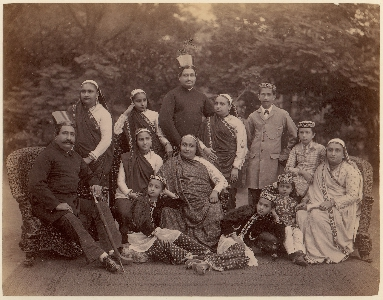

In [27]:
# tag::familyだけはおかしい　アノテーションミス　男だけ女だけとかの可能性もあるがmenとwomen付けとけば良さそう
im = Image.open('../input/imet-2019-fgvc6/train/b17cd6e6494bcd70.png')
im

In [28]:
train_df.loc[train_df.attribute_names.str.contains("tag::athletes")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
10a60a0a7dd37d4a,189 445 813,"culture::italian, tag::athletes, tag::men",3,1,2
1138a7ecc2eb9718,13 445 475 813 896,"culture::american, tag::athletes, tag::bicycles, tag::men, tag::portraits",5,1,4
12d11eb89306d8d8,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
13929ca9d2f31398,13 445 1092,"culture::american, tag::athletes, tag::women",3,1,2
1c061b9d8ff1ebaa,13 445 457 813,"culture::american, tag::athletes, tag::baseball, tag::men",4,1,3
1d0cf648f82f0c2d,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
1d5447b9af4686d5,25 161 420 445 584 813,"culture::attic, culture::greek, tag::animals, tag::athletes, tag::cups, tag::men",6,2,4
1d76aaf34260ebd6,13 445 813 896,"culture::american, tag::athletes, tag::men, tag::portraits",4,1,3
1dc575bda5fa9dc6,13 445 475 813 896,"culture::american, tag::athletes, tag::bicycles, tag::men, tag::portraits",5,1,4


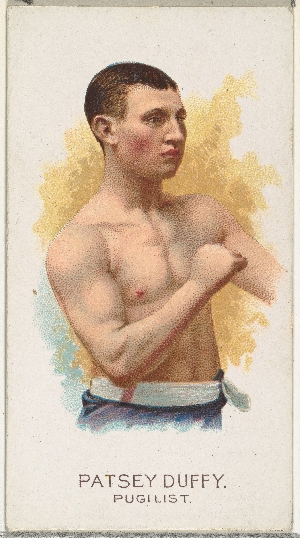

In [29]:
# 明らかboxerなのにboxerラベルがないアノテーションミス
im = Image.open('../input/imet-2019-fgvc6/train/9dc90b94474c9c92.png')
im

In [30]:
train_df.loc[train_df.attribute_names.str.contains("tag::boxing")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
1cc5911b3dabcc5d,231 491 813 995,"culture::mexican, tag::boxing, tag::men, tag::spectators",4,1,3
1fb9afb529706f05,13 491 813,"culture::american, tag::boxing, tag::men",3,1,2
38772aed6843d58a,13 445 491 813 896,"culture::american, tag::athletes, tag::boxing, tag::men, tag::portraits",5,1,4
3f605dade588705d,51 491 813 995,"culture::british, tag::boxing, tag::men, tag::spectators",4,1,3
5346bd015170df92,13 445 491 813 896,"culture::american, tag::athletes, tag::boxing, tag::men, tag::portraits",5,1,4
57e284ae870a00ca,304 491 713,"culture::roman, tag::boxing, tag::hands",3,1,2
6dfcf9aa85f84600,25 161 491 584 813,"culture::attic, culture::greek, tag::boxing, tag::cups, tag::men",5,2,3
7cb82eeba0556534,13 445 491 813 896,"culture::american, tag::athletes, tag::boxing, tag::men, tag::portraits",5,1,4
8ac77a69e3bbd66e,13 491 813 896,"culture::american, tag::boxing, tag::men, tag::portraits",4,1,3


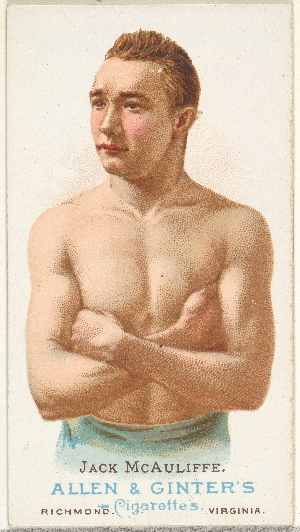

In [31]:
# tag::athletesあり
im = Image.open('../input/imet-2019-fgvc6/train/b76d1c96d5828452.png')
im

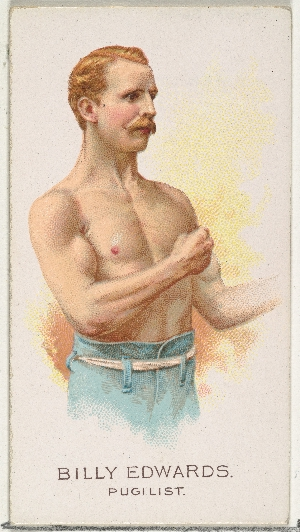

In [32]:
# tag::athletesなし　これは明らかにアノテーションミス
im = Image.open('../input/imet-2019-fgvc6/train/8ac77a69e3bbd66e.png')
im

In [33]:
train_df.loc[train_df.attribute_names.str.contains("baseball")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
12d11eb89306d8d8,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
1c061b9d8ff1ebaa,13 445 457 813,"culture::american, tag::athletes, tag::baseball, tag::men",4,1,3
1d0cf648f82f0c2d,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
1dcdc88c3c8c4502,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
1f525e0b9462a321,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
26152e9192f660a,13 445 457 813,"culture::american, tag::athletes, tag::baseball, tag::men",4,1,3
262c8ef7ad948536,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
2723a240e6eca028,13 445 457 811 813 896,"culture::american, tag::athletes, tag::baseball, tag::medallions, tag::men, tag::portraits",6,1,5
285290e6dea4a40a,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4


In [34]:
train_df.loc[train_df.attribute_names.str.contains("tag::chinese")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
11df549ccceace2c,79 454 477 539,"culture::china, tag::bamboo, tag::birds, tag::chinese",4,1,3
12094f3e5d2abf27,79 539 737 776 1046,"culture::china, tag::chinese, tag::houses, tag::landscapes, tag::trees",5,1,4
17551c19b980a042,79 539,"culture::china, tag::chinese",2,1,1
179de2a31a5f292,79 539,"culture::china, tag::chinese",2,1,1
17b164875a44352b,539 960,"tag::chinese, tag::scrolls",2,0,2
186663b36a431316,79 539 890,"culture::china, tag::chinese, tag::poetry",3,1,2
1f0b6592be0f4b24,539,tag::chinese,1,0,1
21843f032d31beea,79 539,"culture::china, tag::chinese",2,1,1
2be385a7ff476c22,79 539 890,"culture::china, tag::chinese, tag::poetry",3,1,2


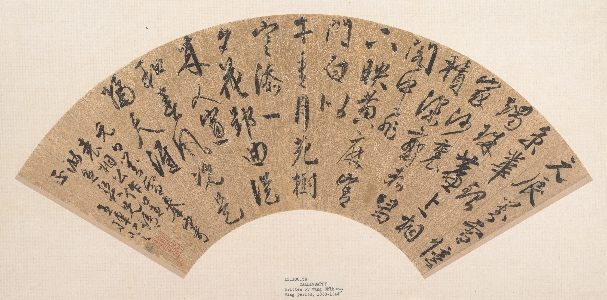

In [35]:
# culture::china, tag::chinese
im = Image.open('../input/imet-2019-fgvc6/train/eb41e12de90cc79c.png')
im

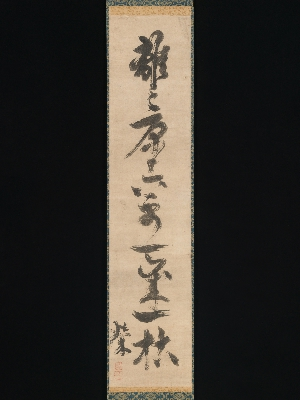

In [36]:
# culture::japan, tag::chinese　おそらくアノテーションミス
im = Image.open('../input/imet-2019-fgvc6/train/e6fbf4add18e7472.png')
im

tag::chineseのcultureはculture::chinaが正しいはずなのは一目瞭然  
tag::chineseに対してはculture::chinaが必ず1:1で対応する  

### Submission check

In [37]:
submission.loc[submission.attribute_names.str.contains("baseball")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
35f9589619b0a453,13 445 457 698 813 896 1092,"culture::american, tag::athletes, tag::baseball, tag::girls, tag::men, tag::portraits, tag::women",7,1,6
808f129d36656453,13 445 457 813 896 930,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits, tag::rowing",6,1,5
c3bec6a450d606dd,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
d30999de9e4ab87c,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4
eb1fc3440ad8a0f8,13 445 457 813 896 930,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits, tag::rowing",6,1,5
ff2704a9be230584,13 445 457 813 896,"culture::american, tag::athletes, tag::baseball, tag::men, tag::portraits",5,1,4


tag::baseballに関しては完璧っぽい

In [38]:
submission.loc[submission.attribute_names.str.contains("tag::chinese")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
4063f409089862de,79 539 890 1097 1099,"culture::china, tag::chinese, tag::poetry, tag::writing, tag::writing systems",5,1,4


tag::chineseに関しても大丈夫そう

In [39]:
submission.loc[submission.attribute_names.str.contains("tag::actors")]\
            .loc[~submission.attribute_names.str.contains("tag::men")]

,attribute_ids,attribute_names,attr_num,culture_attr_num,tag_attr_num
id,,,,,
1613965d28d98664,13 404 405 896 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::women",5,1,4
179eb1e62356453b,13 404 405 896 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::women",5,1,4
2437d8e4d047d650,13 404 405 896 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::women",5,1,4
2593f22a6fa60a46,13 404 405 896 903 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::profiles, tag::women",6,1,5
33302809d044f83b,13 404 405 896 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::women",5,1,4
43d89061be2a68fc,13 404 405 896 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::women",5,1,4
54f71fde5c0effc0,13 404 405 896 903 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::profiles, tag::women",6,1,5
55f712de2a49c7f2,13 404 405 896 903 1092,"culture::american, tag::actors, tag::actresses, tag::portraits, tag::profiles, tag::women",6,1,5
72b8bab760995b0f,25 161 331 351 404 642 961 1092,"culture::attic, culture::greek, culture::south italian, culture::tarentine, tag::actors, tag::er...",8,4,4


tag::men入れてみる？

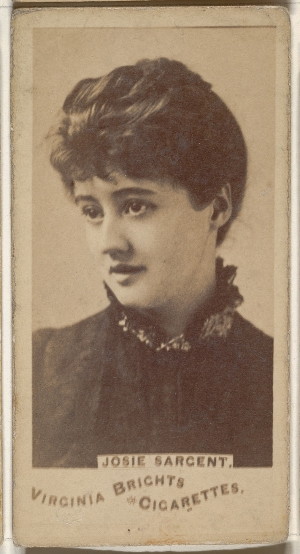

In [40]:
im = Image.open('../input/imet-2019-fgvc6/test/1613965d28d98664.png')
im

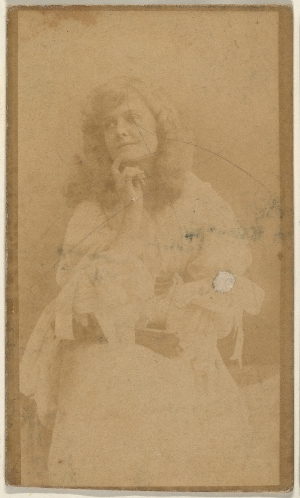

In [41]:
im = Image.open('../input/imet-2019-fgvc6/test/179eb1e62356453b.png')
im

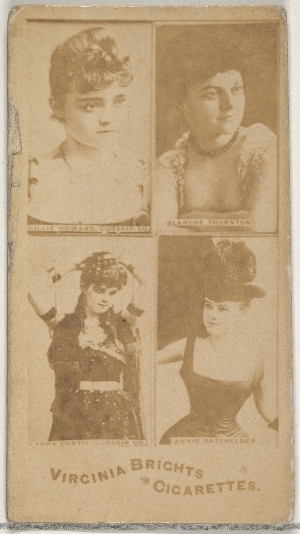

In [42]:
im = Image.open('../input/imet-2019-fgvc6/test/2437d8e4d047d650.png')
im

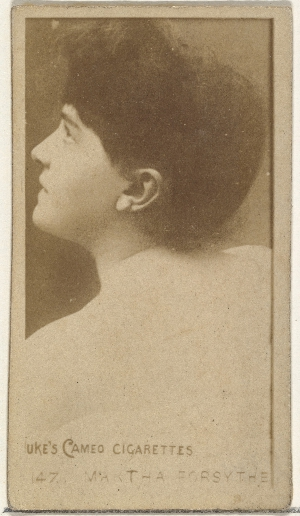

In [43]:
im = Image.open('../input/imet-2019-fgvc6/test/2593f22a6fa60a46.png')
im

LBハックみたいになってしまいますが、どうやらtag::menがないのにtag::actorsがあるのがおかしそう  
というのも、tag::menはtrainデータの中にラベルとして一番多く含まれているため( https://www.kaggle.com/kenmatsu4/first-eda-label-coocurrence-matrix )、一番精度よく学習できているはずなのに、それがないということは、この画像に写っている人物がtag::menである可能性が著しく低いということ  

ちなみにtag::menの次にtrainデータの中にラベルとして一番多く含まれているのはtag::women

すなわち、tag::menとtag::women間ではきっちりどちらであるかをモデルは判断できているが、tag::actorsとtag::actresses間ではどちらであるかをモデルは判断できていない

girls boysにも応用できるかも

### Validation Check

In [44]:
import gc
import os
import sys
import time
import random
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.nn.functional as F
import torchvision as vision
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler

from pathlib import Path
from PIL import Image
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')

from joblib import Parallel, delayed
from tqdm import tqdm, tqdm_notebook
from fastprogress import master_bar, progress_bar

from sklearn.model_selection import KFold
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split

In [45]:
labels = pd.read_csv("../input/imet-2019-fgvc6/labels.csv")
train = pd.read_csv("../input/imet-2019-fgvc6/train.csv")

In [46]:
input_size = 224

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_transforms["test"] = data_transforms["val"]

In [47]:
class IMetDataset(data.Dataset):
    def __init__(self, datafolder, datatype='train', index=[], device="cuda:0",
                 transform=transforms.Compose([transforms.CenterCrop(32),transforms.ToTensor()]), 
                 labels_dict={}):
        self.datafolder = datafolder
        self.datatype = datatype
        self.index = index
        self.device = device
        self.transform = transform
        self.labels_dict = labels_dict
        if self.datatype == 'train' or self.datatype == 'val':
            if self.index==[]:
                self.image_files_list = [s for s in os.listdir(datafolder)]
                #self.labels = [labels_dict[i.split('.')[0]] for i in self.image_files_list]
            else:
                self.image_files_list = np.array([s for s in os.listdir(datafolder)])[index]
                #self.labels = [labels_dict[i.split('.')[0]] for i in self.image_files_list]
        else:
            self.image_files_list = [s for s in os.listdir(datafolder)]
            #self.labels = [labels_dict[i.split('.')[0]] for i in self.image_files_list]
        
    def __len__(self):
        return len(self.image_files_list)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.datafolder, self.image_files_list[idx])
        image = Image.open(img_name)
        image = self.transform(image)
        img_name_short = self.image_files_list[idx].split('.')[0]
        if self.datatype == 'train' or self.datatype == 'val':
            label = self.labels_dict[img_name_short]
            # Target has some labels, So we need to change labels to tensor
            label_tensor = torch.zeros((1, 1103))
            for i in label:
                label_tensor[0, int(i)] = 1
            label_tensor = label_tensor.to(self.device)
            return image, label_tensor
        else:
            label = 0
            return image, label

In [48]:
class Predictioner:
    def __init__(self, model, valid_batch=128, seed=1234, 
                 device="cuda:0", load_model_name="best_model.pth"):
        self.model = model
        self.load_model_name = load_model_name
        self.valid_batch = valid_batch
        self.seed = seed
        self.device = device

    def val(self, val_idx, img_class_dict):
        # valid loader
        valid_dataset = IMetDataset(datafolder='../input/imet-2019-fgvc6/train/', 
                                    datatype='val', 
                                    index=val_idx, 
                                    transform=data_transforms["val"], 
                                    labels_dict=img_class_dict)
        loader = data.DataLoader(valid_dataset,
                                 batch_size=self.valid_batch,
                                 shuffle=False)
        # model
        model = self.model
        # load model pth
        model.load_state_dict(torch.load(self.load_model_name))
        model.to(self.device)
        model.eval()
        valid_preds = np.zeros((len(loader.dataset), 1103))
        valid_y = np.zeros((len(loader.dataset), 1103))
        avg_val_loss = 0.0
        for i, (i_batch, y_batch) in enumerate(loader):
            with torch.no_grad():
                y_pred = model(i_batch.cuda()).detach()
                y_batch = y_batch.view(y_batch.size()[0], -1) # flatten y_batch
                #avg_val_loss += self.loss_fn(y_pred, y_batch).item() / len(loader)
                if i_batch.size()[0]==self.valid_batch:
                    valid_preds[i * self.valid_batch : (i+1) * self.valid_batch] = y_pred.cpu().numpy()
                    valid_y[i * self.valid_batch : (i+1) * self.valid_batch] = y_batch.cpu().numpy()
                else:
                    valid_preds[len(loader.dataset) - i_batch.size()[0] : ] = y_pred.cpu().numpy()
                    valid_y[len(loader.dataset) - i_batch.size()[0] : ] = y_batch.cpu().numpy()
        return valid_preds, valid_y#, avg_val_loss
    
    def predict(self, loader):
        model = self.model
        # load model pth
        model.load_state_dict(torch.load(self.load_model_name))
        model.to(self.device)
        model.eval()
        preds = np.zeros((len(loader.dataset), 1103))
        for i, (i_batch, _) in enumerate(loader):
            with torch.no_grad():
                y_pred = model(i_batch.cuda()).detach()
                if i_batch.size()[0]==self.valid_batch:
                    preds[i * self.valid_batch : (i+1) * self.valid_batch] = y_pred.cpu().numpy()
                else:
                    preds[len(loader.dataset) - i_batch.size()[0] : ] = y_pred.cpu().numpy()
        return preds

In [49]:
# https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model

In [50]:
model_conv = resnet18(pretrained=False)

In [51]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        
    def forward(self, x):
        return x

num_ftrs = model_conv.fc.in_features
#model_conv.fc = nn.Linear(num_ftrs, 1103)
model_conv.fc = Classifier()

In [52]:
# MLP
mlp = nn.Sequential(
    nn.Linear(num_ftrs, num_ftrs),
    nn.ReLU(),
    nn.BatchNorm1d(num_ftrs),
    nn.Dropout(0.25),
    nn.Linear(num_ftrs, 1103)
)

In [53]:
net = nn.Sequential(
    model_conv,
    mlp,
    nn.Sigmoid()
)

In [54]:
predictioner = Predictioner(net, valid_batch=128, seed=1234, device="cuda:0", 
                            load_model_name="../input/imet-my-pretrained-models/resnet18_0.562.pth")

In [55]:
# indices for validation
tr, val = train_test_split(train.id, test_size=0.2, random_state=1234)
tr, val = tr.index, val.index
#tr, val = list(tr), list(val)
# X_train, y_train, X_val, y_val
img_class_dict = {k:v for k, v in zip(train.id, train.attribute_ids.map(lambda x: x.split()).values)}

In [56]:
valid_preds, valid_y = predictioner.val(val, img_class_dict)

In [57]:
def threshold_search(y_pred, y_true):
    score = []
    candidates = np.arange(0, 0.2, 0.01)
    for th in progress_bar(candidates):
        yp = (y_pred > th).astype(int)
        score.append(fbeta_score(y_pred=yp, y_true=y_true, beta=2, average="samples"))
    score = np.array(score)
    pm = score.argmax()
    best_th, best_score = candidates[pm], score[pm]
    plt.plot(candidates, score)
    plt.vlines(x=best_th, ymin=score.min(), ymax=score.max())
    plt.text(best_th+0.03, best_score-0.01, f'$F_{2}=${best_score:.3f}', fontsize=14);
    plt.show()
    return best_th, best_score

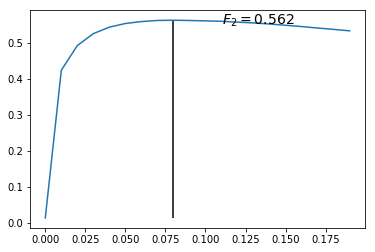

In [58]:
best_threshold, best_score = threshold_search(valid_preds, valid_y)

In [59]:
best_score

0.5622326138496078

In [60]:
k = 11
np.argpartition(-valid_preds[0], k)[:k]

array([1092,  418,  709,  858,  835,  189,  813,  554,  477,  738,  597])

In [61]:
tmp = valid_preds > best_threshold
tmp

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

### 813:men, 1092:women, 404:actors, 1457:actresses

In [62]:
!ls "../input/imet-mydataset/"

labels.csv  submission.csv  train_with_size_feats.csv


In [63]:
labels = pd.read_csv("../input/imet-mydataset/labels.csv")

In [64]:
labels.sort_values("counts", ascending=False).head()

,attribute_id,attribute_name,counts
813,813,tag::men,19970
1092,1092,tag::women,14281
147,147,culture::french,13522
189,189,culture::italian,10375
13,13,culture::american,9151


In [65]:
tmp2 = tmp.copy()
for i, row in enumerate(tmp2):
    ids = np.nonzero(row)[0]
    # no men but acotors
    if (404 in ids) and (813 not in ids):
        tmp2[i][404] = 0

In [66]:
print(fbeta_score(y_pred=tmp2, y_true=valid_y, beta=2, average="samples"))

0.5622421878345909


0.5622326138496078 -> 0.5622421878345909  にスコアが上がった

In [67]:
k = 11
tmp2 = tmp.copy()
for i, row in enumerate(tmp2):
    ids = np.nonzero(row)[0]
    # no men but acotors
    if (404 in ids) and (813 not in ids):
        tmp2[i][404] = 0
    # max 11 labels
    if tmp2[i].sum()>k:
        ids = np.argpartition(-valid_preds[i], k)[:k]
        tmp2[i] = 0
        tmp2[i][ids] = 1

In [68]:
print(fbeta_score(y_pred=tmp2, y_true=valid_y, beta=2, average="samples"))

0.5622578402764876


0.5622421878345909 -> 0.5622578402764876 にスコアが上がった

In [69]:
labels[:400].tail()

,attribute_id,attribute_name,counts
395,395,culture::zenu,8
396,396,culture::zoroastrian,1
397,397,culture::zurich,29
398,398,tag::abbies,22
399,399,tag::abraham,48


In [70]:
tmp2 = tmp.copy()
for i, row in enumerate(tmp2):
    ids = np.nonzero(row)[0]
    # no men but acotors
    if (404 in ids) and (813 not in ids):
        tmp2[i][404] = 0
    # max 4 culture labels
    k = 4
    if tmp2[i][:398].sum()>k:
        ids = np.argpartition(-valid_preds[i][:398], k)[:k]
        tmp2[i][:398] = 0
        tmp2[i][ids] = 1
        
print(fbeta_score(y_pred=tmp2, y_true=valid_y, beta=2, average="samples"))

0.562285572566811


0.5622578402764876 -> 0.562285572566811 にスコアが上がった

In [71]:
tmp2 = tmp.copy()
for i, row in enumerate(tmp2):
    ids = np.nonzero(row)[0]
    # no men but acotors
    if (404 in ids) and (813 not in ids):
        tmp2[i][404] = 0
    # max 9 tag labels
    k = 9
    if tmp2[i][398:].sum()>k:
        ids = np.argpartition(-valid_preds[i][398:], k)[:k]
        tmp2[i][398:] = 0
        tmp2[i][ids] = 1
print(fbeta_score(y_pred=tmp2, y_true=valid_y, beta=2, average="samples"))

0.5507165387465075


tag labels を絞るのはダメ  
全体ラベルを絞ったときにスコアが上がったのはculture labelが関わっていた可能性が高い  
よってculture labelだけで絞るのがベスト  